### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

# Aula 1

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [15]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [5]:
y = df['diabetes']
X = df.drop(columns='diabetes',axis=1)
X.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc
0,66,23,94,28.1,0.167
1,40,35,168,43.1,2.288
2,50,32,88,31.0,0.248
3,70,45,543,30.5,0.158
4,60,23,846,30.1,0.398


### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [8]:
X, X_test, y, y_test = train_test_split(X,y, test_size=.05, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=.25, stratify=y, random_state=42)

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [11]:
tree = DecisionTreeClassifier(max_depth=3)
forest = RandomForestClassifier(max_depth=3)

tree.fit(X_train,y_train)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [14]:
print(f"Ácuracia árvore treino: {tree.score(X_train,y_train)}")
print(f"Ácuracia árvore validação: {tree.score(X_val,y_val)}")
print(f"Ácuracia floresta treino: {forest.score(X_train,y_train)}")
print(f"Ácuracia floresta validacao: {forest.score(X_val,y_val)}")

Ácuracia árvore treino: 0.8107142857142857
Ácuracia árvore validação: 0.6702127659574468
Ácuracia floresta treino: 0.8178571428571428
Ácuracia floresta validacao: 0.648936170212766


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [22]:
matriz_confusao = confusion_matrix(y_val, tree.predict(X_val))
matriz_confusao

array([[46, 17],
       [14, 17]])

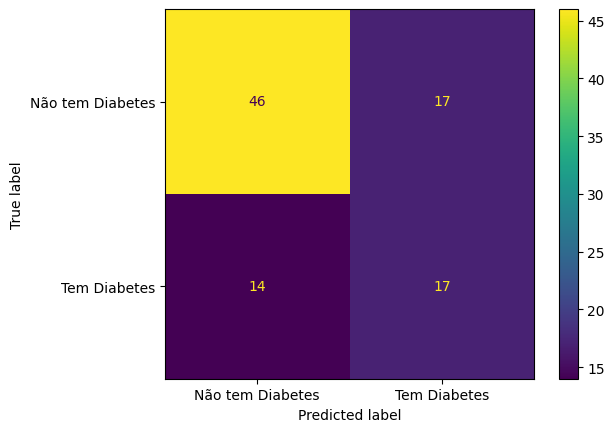

In [23]:
visu = ConfusionMatrixDisplay(matriz_confusao, display_labels=['Não tem Diabetes','Tem Diabetes'])
visu.plot();

In [24]:
matriz_confusao = confusion_matrix(y_val, forest.predict(X_val))
matriz_confusao

array([[50, 13],
       [20, 11]])

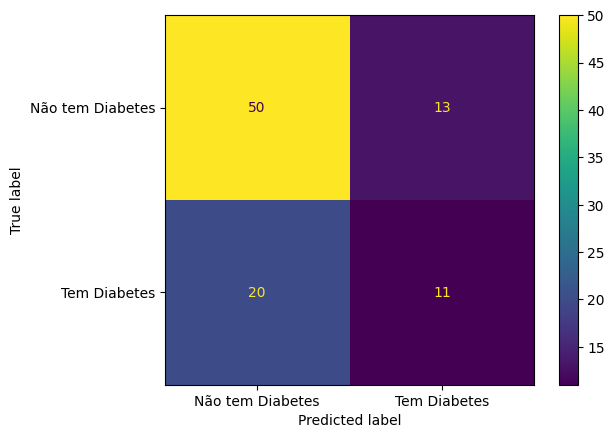

In [25]:
visu = ConfusionMatrixDisplay(matriz_confusao, display_labels=['Não tem Diabetes','Tem Diabetes'])
visu.plot();

# Aula 2

### Desafio 1

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1.

In [26]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [28]:
print(f'Acurácia: {accuracy_score(y_val, tree.predict(X_val))}')
print(f'Recall: {recall_score(y_val, tree.predict(X_val))}')
print(f'Precisão: {precision_score(y_val, tree.predict(X_val))}')
print(f'F1-Score: {f1_score(y_val, tree.predict(X_val))}')

Acurácia: 0.6702127659574468
Recall: 0.5483870967741935
Precisão: 0.5
F1-Score: 0.5230769230769231


In [29]:
print(f'Acurácia: {accuracy_score(y_val, forest.predict(X_val))}')
print(f'Recall: {recall_score(y_val, forest.predict(X_val))}')
print(f'Precisão: {precision_score(y_val, forest.predict(X_val))}')
print(f'F1-Score: {f1_score(y_val, forest.predict(X_val))}')

Acurácia: 0.648936170212766
Recall: 0.3548387096774194
Precisão: 0.4583333333333333
F1-Score: 0.4


### Desafio 2

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [30]:
from sklearn.metrics import RocCurveDisplay

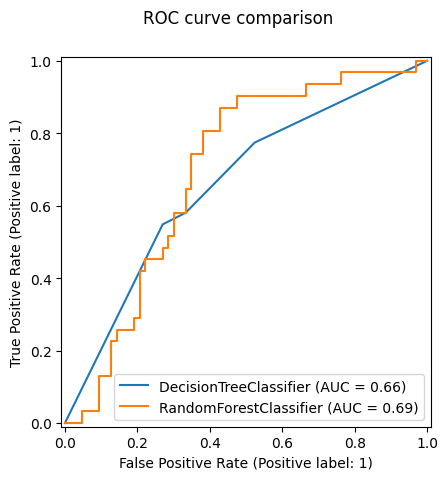

In [33]:
tree_disp = RocCurveDisplay.from_estimator(tree, X_val, y_val)
rfc_disp = RocCurveDisplay.from_estimator(forest, X_val, y_val, ax=tree_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison");

### Desafio 3

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [35]:
from sklearn.metrics import PrecisionRecallDisplay

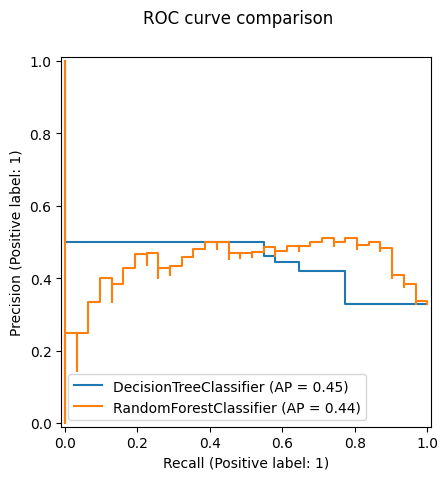

In [36]:
tree_disp = PrecisionRecallDisplay.from_estimator(tree, X_val, y_val)
rfc_disp = PrecisionRecallDisplay.from_estimator(forest, X_val, y_val, ax=tree_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison");

### Desafio 4

Gere os relatórios de métricas dos modelos de classificação gerados no desafio da aula 1.

In [37]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_val,tree.predict(X_val)))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        63
           1       0.50      0.55      0.52        31

    accuracy                           0.67        94
   macro avg       0.63      0.64      0.64        94
weighted avg       0.68      0.67      0.67        94



In [40]:
print(classification_report(y_val,forest.predict(X_val)))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        63
           1       0.46      0.35      0.40        31

    accuracy                           0.65        94
   macro avg       0.59      0.57      0.58        94
weighted avg       0.63      0.65      0.64        94



# Aula 3

### Desafio 1

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



In [46]:
def inter_conf(modelo:str, resultados):
  media = resultados.mean()
  std = resultados.std()
  print(f'Intervalo de confiança {modelo}: [{media - 2*std}, {min(media + 2*std,1)}]')


### Desafio 2

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [42]:
from sklearn.model_selection import cross_val_score, KFold

In [48]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_tree = cross_val_score(tree, X, y, cv=kf)
cv_forest = cross_val_score(forest, X, y, cv=kf)

In [52]:
inter_conf('Árvore Decisão',cv_tree)
inter_conf('Random Forest',cv_forest)

Intervalo de confiança Árvore Decisão: [0.5851121357962996, 0.8429106238054072]
Intervalo de confiança Random Forest: [0.5761219560916424, 0.8570217138941327]


### Desafio 3

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [57]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_tree = cross_val_score(tree, X,y, cv=skf , scoring='f1')
cv_forest = cross_val_score(forest, X, y, cv=skf, scoring='f1')

In [58]:
inter_conf('Árvore Decisão',cv_tree)
inter_conf('Random Forest',cv_forest)

Intervalo de confiança Árvore Decisão: [0.08325611165376445, 0.8981607770306763]
Intervalo de confiança Random Forest: [0.2221388381586522, 0.6982744023003549]


### Desafio 4

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


In [59]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
cv_tree = cross_val_score(tree, X,y, cv=loo)
cv_forest = cross_val_score(forest, X, y, cv=loo)

In [60]:
print(f'Acurácia média (Decision Tree): {cv_tree.mean()}')
print(f'Acurácia média (Random Forest):{cv_forest.mean()}')

Acurácia média (Decision Tree): 0.7085561497326203
Acurácia média (Random Forest):0.7085561497326203


# Aula 4

### Desafio 1

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

In [61]:
df['diabetes'].value_counts(normalize=True)

,proportion
diabetes,
0,0.670051
1,0.329949


### Desafio 2

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [62]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

In [63]:
pipeline = imbpipeline([
    ('oversample', SMOTE()),
    ('arvore', tree)
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_tree = cross_val_score(pipeline, X, y, scoring='f1', cv=skf)


In [65]:
print(f"Média F1-Score: {cv_tree.mean()}")
inter_conf('Árvore', cv_tree)

Média F1-Score: 0.6042677954556512
Intervalo de confiança Árvore: [0.4437335975916382, 0.7648019933196643]


In [72]:
pipeline = imbpipeline([
    ('oversample', SMOTE()),
    ('rf', forest)
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_forest = cross_val_score(pipeline, X, y, scoring='f1', cv=skf)

In [73]:
print(f"Média F1-Score: {cv_forest.mean()}")
inter_conf('Random Forest', cv_forest)

Média F1-Score: 0.6286372477203264
Intervalo de confiança Random Forest: [0.49018958885198916, 0.7670849065886636]


### Desafio 3

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [66]:
from imblearn.under_sampling import NearMiss

In [67]:
pipeline = imbpipeline([
    ('undersample', NearMiss(version=3)),
    ('arvore', tree)
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_tree = cross_val_score(pipeline, X, y, scoring='f1', cv=skf)


In [68]:
print(f"Média F1-Score: {cv_tree.mean()}")
inter_conf('Árvore', cv_tree)

Média F1-Score: 0.5485763844046647
Intervalo de confiança Árvore: [0.350792310085965, 0.7463604587233644]


In [74]:
pipeline = imbpipeline([
    ('undersample', NearMiss(version=3)),
    ('rf', forest)
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_forest = cross_val_score(pipeline, X, y, scoring='f1', cv=skf)

In [75]:
print(f"Média F1-Score: {cv_forest.mean()}")
inter_conf('Árvore', cv_forest)

Média F1-Score: 0.6026271670979059
Intervalo de confiança Árvore: [0.5252822653416289, 0.6799720688541828]


### Desafio 4

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.50      0.57      0.53         7

    accuracy                           0.65        20
   macro avg       0.62      0.63      0.63        20
weighted avg       0.66      0.65      0.65        20



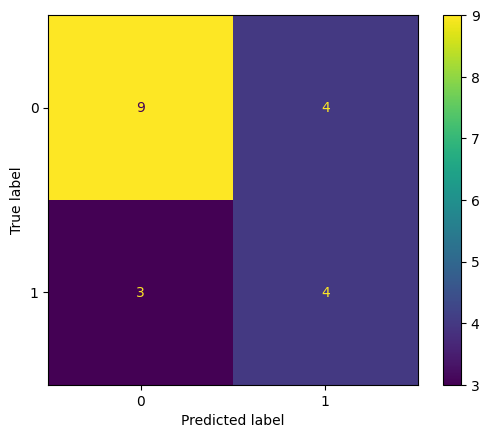

In [76]:
oversample = SMOTE()
X_balanceado, y_balanceado = oversample.fit_resample(X,y)

tree = RandomForestClassifier(max_depth=2)
tree.fit(X_balanceado, y_balanceado)

y_predict = tree.predict(X_test)

print(classification_report(y_test,y_predict))
ConfusionMatrixDisplay.from_predictions(y_test,y_predict)